# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


In [ ]:
# Import all the required libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Basic EDA on cnbc_headlines dataset

In [ ]:

from google.colab import files
cnbc= files.upload()

Saving cnbc_headlines.csv to cnbc_headlines.csv


In [ ]:
cnbc=pd.read_csv("cnbc_headlines.csv")
cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [ ]:
# check the shape of cnbc headline dataset
cnbc.shape

(3080, 3)

In [ ]:
# Check all the columns in the cnbc headline dataset
cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [ ]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [ ]:
 # drop nan values in cnbc headline dataset
cnbc.dropna(inplace=True)

In [ ]:
# drop the duplicate rows in the dataset keep the first one
cnbc.drop_duplicates(keep='first',inplace=True)

In [ ]:
# check the shape of cnbc headline dataset
cnbc.shape

(2800, 3)

# Basic EDA on Gaurdian headlines dataset

In [ ]:

from google.colab import files
x= files.upload()

Saving guardian_headlines.csv to guardian_headlines.csv


In [ ]:
g=pd.read_csv("guardian_headlines.csv")
g

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


In [ ]:
#check the shape of gaurdian headline dataset
g.shape

(17800, 2)

In [ ]:
#check columns of gaurdian headline
g.columns

Index(['Time', 'Headlines'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [ ]:
# check null values in gaurdian headlines dataset
g.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [ ]:
# drop duplicate rows in headlines and keep the first one
g.drop_duplicates(keep='first',inplace=True)
g

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


# Basic EDA on reuters headlines

In [ ]:

from google.colab import files
x= files.upload()

Saving reuters_headlines.csv to reuters_headlines.csv


In [ ]:
r=pd.read_csv("reuters_headlines.csv")
r

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [ ]:
#check the shape of reuters headlines dataset
r.shape

(32770, 3)

In [ ]:
#check the columns of reuters headline dataset
r.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [ ]:
# Check for missing values in all the columnns of reuters headlines dataset
r.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
r.drop_duplicates(keep='first',inplace=True)

Text Preprocessing

In [ ]:
# create a function for preprocessing

  #convert all to lowercase
def low(text):
  return text.lower()

  #remove puntuations
def sc(text):
  x=""
  for i in text:
    if i.isalnum():
      x=x+i
    else:
      x=x+" "
  return x

  #remove stopword
def stop(text):
  x=[]
  for i in text.split():
    if i not in stopwords.words('english'):
      x.append(i)

  return x

  #stemming

def stemming(text):
  x=[]
  for i in text:
    x.append(ps.stem(i))

  return x

  #lemmitizing
def lemmat(text):
  x=[]
  for i in text:
    x.append(lemmatizer.lemmatize(i))

  return x


SENTIMENT ANAYSIS

In [ ]:
# import sentiment intensity analyzer

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Now working with description on datasets

In [ ]:
# concatenate cnbc headlines dataset and reuters headline dataset
print("cnbc",cnbc.columns)
print("Guardian",g.columns)
print("Reuters",r.columns)

cnbc Index(['Headlines', 'Time', 'Description'], dtype='object')
Guardian Index(['Time', 'Headlines'], dtype='object')
Reuters Index(['Headlines', 'Time', 'Description'], dtype='object')


In [ ]:
df=pd.concat([cnbc,r],ignore_index=True)
df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [ ]:
#check the shape of this new dataset
df.shape

(35515, 3)

In [ ]:
df.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35515 entries, 0 to 35514
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    35515 non-null  object
 1   Time         35515 non-null  object
 2   Description  35515 non-null  object
dtypes: object(3)
memory usage: 832.5+ KB


In [ ]:
# apply preprocessing to the description of new dataset
df['Description']=df['Description'].apply(low)
df


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""mad money"" host jim cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""mad money"" host jim cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""we'll pay more for the earnings of the non-co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","keith bliss, iq capital ceo, joins ""closing be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""look for the stocks of high-quality companies..."
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,the malaysian government and the ruling party ...
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutors said on tuesday they had se...
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald's corp on tuesday announced an approv...
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt & whitney will soon begin deliveries of ...


In [ ]:
df['Description']=df['Description'].apply(sc)
df


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer rings the lightnin...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",we ll pay more for the earnings of the non co...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo joins closing be...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look for the stocks of high quality companies...
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,the malaysian government and the ruling party ...
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutors said on tuesday they had se...
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald s corp on tuesday announced an approv...
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney will soon begin deliveries of ...


In [ ]:
df['Description']=df['Description'].apply(stop)
df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","[mad, money, host, jim, cramer, recommended, b..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","[mad, money, host, jim, cramer, rings, lightni..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","[pay, earnings, non, covid, companies, lancet,..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","[keith, bliss, iq, capital, ceo, joins, closin..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","[look, stocks, high, quality, companies, going..."
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,"[malaysian, government, ruling, party, tuesday..."
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,"[german, prosecutors, said, tuesday, searched,..."
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,"[mcdonald, corp, tuesday, announced, approved,..."
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,"[pratt, whitney, soon, begin, deliveries, spar..."


In [ ]:
df['Description']=df['Description'].apply(stemming)
df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","[mad, money, host, jim, cramer, recommend, buy..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","[mad, money, host, jim, cramer, ring, lightn, ..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","[pay, earn, non, covid, compani, lancet, publi..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","[keith, bliss, iq, capit, ceo, join, close, be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","[look, stock, high, qualiti, compani, go, lowe..."
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,"[malaysian, govern, rule, parti, tuesday, deni..."
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,"[german, prosecutor, said, tuesday, search, vo..."
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,"[mcdonald, corp, tuesday, announc, approv, sci..."
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,"[pratt, whitney, soon, begin, deliveri, spare,..."


In [ ]:
df['Description']=df['Description'].apply(lemmat)
df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","[mad, money, host, jim, cramer, recommend, buy..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","[mad, money, host, jim, cramer, ring, lightn, ..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","[pay, earn, non, covid, compani, lancet, publi..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","[keith, bliss, iq, capit, ceo, join, close, be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","[look, stock, high, qualiti, compani, go, lowe..."
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,"[malaysian, govern, rule, parti, tuesday, deni..."
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,"[german, prosecutor, said, tuesday, search, vo..."
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,"[mcdonald, corp, tuesday, announc, approv, sci..."
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,"[pratt, whitney, soon, begin, deliveri, spare,..."


In [ ]:
df['Description']=df['Description'].apply(lambda d:" ".join(d))


In [ ]:
df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earn non covid compani lancet publish good...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high qualiti compani go lower even ...
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...


In [ ]:
#fuction to  decide sentiment as positive, negative and neutral
df['scores'] = df['Description'].apply(lambda desc: sid.polarity_scores(desc))

df.head()

,Headlines,Time,Description,scores
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,"{'neg': 0.184, 'neu': 0.517, 'pos': 0.299, 'co..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earn non covid compani lancet publish good...,"{'neg': 0.086, 'neu': 0.736, 'pos': 0.178, 'co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high qualiti compani go lower even ...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp..."


In [ ]:
df.scores[0]

{'compound': 0.25, 'neg': 0.184, 'neu': 0.517, 'pos': 0.299}

In [ ]:
# analyze polarity score of values in description and  add new column of it in dataset
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Headlines,Time,Description,scores,compound
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,"{'neg': 0.184, 'neu': 0.517, 'pos': 0.299, 'co...",0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earn non covid compani lancet publish good...,"{'neg': 0.086, 'neu': 0.736, 'pos': 0.178, 'co...",0.3612
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high qualiti compani go lower even ...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.6597


In [ ]:
# apply the function  which decides sentiment to  polarity score column
def comp_score(n):
  if (n>0):
    return 'Positive'
  elif(n<0):
    return 'Negative'
  else:
    return "Neutral"
df['comp_score'] = df['compound'].apply(comp_score)

df.head()

,Headlines,Time,Description,scores,compound,comp_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,"{'neg': 0.184, 'neu': 0.517, 'pos': 0.299, 'co...",0.2500,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.4939,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earn non covid compani lancet publish good...,"{'neg': 0.086, 'neu': 0.736, 'pos': 0.178, 'co...",0.3612,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.7096,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high qualiti compani go lower even ...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.6597,Negative


In [ ]:
df2=df

In [ ]:
df2

,Headlines,Time,Description,scores,compound,comp_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,"{'neg': 0.184, 'neu': 0.517, 'pos': 0.299, 'co...",0.2500,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.4939,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earn non covid compani lancet publish good...,"{'neg': 0.086, 'neu': 0.736, 'pos': 0.178, 'co...",0.3612,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.7096,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high qualiti compani go lower even ...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.6597,Negative
...,...,...,...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.2732,Negative
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,"{'neg': 0.101, 'neu': 0.858, 'pos': 0.041, 'co...",-0.3818,Negative


In [ ]:
df['comp_score'].value_counts()

Positive    15380
Negative    12474
Neutral      7661
Name: comp_score, dtype: int64

In [ ]:
a=pd.DataFrame(df['comp_score'].value_counts())
a.reset_index()

,index,comp_score
0,Positive,15380
1,Negative,12474
2,Neutral,7661


In [ ]:
a.index

Index(['Positive', 'Negative', 'Neutral'], dtype='object')

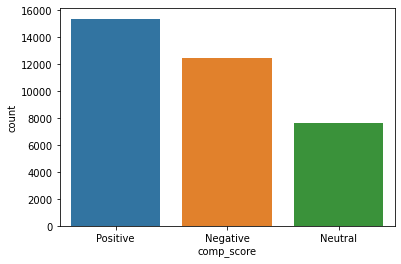

In [ ]:
# plot a count plot on description score column
import seaborn as sns
sns.countplot(data=df,x='comp_score')

In the description

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

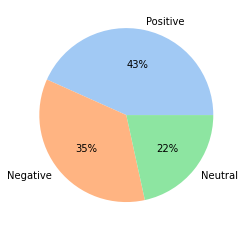

In [ ]:
# pie chart on description score column

colors = sns.color_palette('pastel')[0:5]
plt.pie(a['comp_score'],labels=a.index, colors = colors, autopct='%.0f%%')
plt.show()

In the dataset

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['comp_score'])

In [ ]:
df

,Headlines,Time,Description,scores,compound,comp_score,label
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,"{'neg': 0.184, 'neu': 0.517, 'pos': 0.299, 'co...",0.2500,Positive,2
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.4939,Negative,0
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earn non covid compani lancet publish good...,"{'neg': 0.086, 'neu': 0.736, 'pos': 0.178, 'co...",0.3612,Positive,2
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.7096,Positive,2
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high qualiti compani go lower even ...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.6597,Negative,0
...,...,...,...,...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,1
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,1
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.2732,Negative,0
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,"{'neg': 0.101, 'neu': 0.858, 'pos': 0.041, 'co...",-0.3818,Negative,0


In [ ]:
le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
# split the dataset  into test and train

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Description'], df['label'], test_size=0.1, random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [ ]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
lvc=LinearSVC()

pipe = make_pipeline(tfidf_vectorizer,lvc)
pipe.fit(x_train, y_train)

# predict on test dataset
yp=pipe.predict(x_test)
# print accuracy score
from sklearn.metrics import accuracy_score
print("accuracy_score:-",accuracy_score(y_test,yp))
#print confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#print classification report
print(confusion_matrix(y_test,yp))
print(classification_report(y_test,yp))


accuracy_score:- 0.933277027027027
[[1148   30   73]
 [  21  696   30]
 [  53   30 1471]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1251
           1       0.92      0.93      0.93       747
           2       0.93      0.95      0.94      1554

    accuracy                           0.93      3552
   macro avg       0.93      0.93      0.93      3552
weighted avg       0.93      0.93      0.93      3552

CPU times: user 1.36 s, sys: 10.4 ms, total: 1.37 s
Wall time: 1.39 s


LOGISTIC REGRESSION


In [ ]:
%%time
# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
log_model = LogisticRegression()
cv=CountVectorizer()
tfidf=TfidfTransformer(smooth_idf=True,use_idf=True)
clf = make_pipeline(cv,tfidf,log_model)
clf.fit(x_train, y_train)
yp=clf.predict(x_test)
print(confusion_matrix(y_test,yp))
print(classification_report(y_test,yp))
print("accuracy_score:-",accuracy_score(y_test,yp))

[[1083   64  104]
 [  37  661   49]
 [  79   45 1430]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1251
           1       0.86      0.88      0.87       747
           2       0.90      0.92      0.91      1554

    accuracy                           0.89      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.89      0.89      0.89      3552

accuracy_score:- 0.893581081081081
CPU times: user 6.05 s, sys: 5.71 s, total: 11.8 s
Wall time: 6.45 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
multi=MultinomialNB()
cv=CountVectorizer()
tfidf=TfidfTransformer(smooth_idf=True,use_idf=True)
clf1 = make_pipeline(cv,tfidf,multi)
clf1.fit(x_train, y_train)
yp=clf1.predict(x_test)
print(confusion_matrix(y_test,yp))
print(classification_report(y_test,yp))
print("accuracy_score:-",accuracy_score(y_test,yp))

[[ 816    8  427]
 [ 158   79  510]
 [ 141    3 1410]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      1251
           1       0.88      0.11      0.19       747
           2       0.60      0.91      0.72      1554

    accuracy                           0.65      3552
   macro avg       0.74      0.56      0.53      3552
weighted avg       0.71      0.65      0.60      3552

accuracy_score:- 0.6489301801801802
CPU times: user 815 ms, sys: 6.15 ms, total: 821 ms
Wall time: 826 ms


BERNOULLI NAIVE BAYES


In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
b=BernoulliNB()
cv=CountVectorizer()
tfidf=TfidfTransformer(smooth_idf=True,use_idf=True)
clf2 = make_pipeline(cv,tfidf,b)
clf2.fit(x_train, y_train)
yp=clf2.predict(x_test)
print(confusion_matrix(y_test,yp))
print(classification_report(y_test,yp))
print("accuracy_score:-",accuracy_score(y_test,yp))

[[ 928   62  261]
 [ 138  436  173]
 [ 229   79 1246]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1251
           1       0.76      0.58      0.66       747
           2       0.74      0.80      0.77      1554

    accuracy                           0.73      3552
   macro avg       0.74      0.71      0.72      3552
weighted avg       0.74      0.73      0.73      3552

accuracy_score:- 0.7347972972972973
CPU times: user 831 ms, sys: 6.69 ms, total: 838 ms
Wall time: 844 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier



from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
gbc=GradientBoostingClassifier()
cv=CountVectorizer()
tfidf=TfidfTransformer(smooth_idf=True,use_idf=True)
clf3 = make_pipeline(cv,tfidf,gbc)
clf3.fit(x_train, y_train)
yp=clf3.predict(x_test)
print(confusion_matrix(y_test,yp))
print(classification_report(y_test,yp))
print("accuracy_score:-",accuracy_score(y_test,yp))


[[ 922  150  179]
 [   9  721   17]
 [  82  131 1341]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1251
           1       0.72      0.97      0.82       747
           2       0.87      0.86      0.87      1554

    accuracy                           0.84      3552
   macro avg       0.83      0.86      0.84      3552
weighted avg       0.85      0.84      0.84      3552

accuracy_score:- 0.8400900900900901
CPU times: user 1min 15s, sys: 160 ms, total: 1min 15s
Wall time: 1min 16s


XGBOOST CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier



from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
xgb=XGBClassifier()
cv=CountVectorizer()
tfidf=TfidfTransformer(smooth_idf=True,use_idf=True)
clf4 = make_pipeline(cv,tfidf,xgb)
clf4.fit(x_train, y_train)
yp=clf4.predict(x_test)
print(confusion_matrix(y_test,yp))
print(classification_report(y_test,yp))
print("accuracy_score:-",accuracy_score(y_test,yp))

[[ 883  183  185]
 [  13  721   13]
 [  86  204 1264]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1251
           1       0.65      0.97      0.78       747
           2       0.86      0.81      0.84      1554

    accuracy                           0.81      3552
   macro avg       0.80      0.83      0.80      3552
weighted avg       0.83      0.81      0.81      3552

accuracy_score:- 0.8074324324324325
CPU times: user 30.5 s, sys: 50.8 ms, total: 30.6 s
Wall time: 30.6 s


DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier





from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier()
cv=CountVectorizer()
tfidf=TfidfTransformer(smooth_idf=True,use_idf=True)
clf5 = make_pipeline(cv,tfidf,dt)
clf5.fit(x_train, y_train)
yp=clf5.predict(x_test)
print(confusion_matrix(y_test,yp))
print(classification_report(y_test,yp))
print("accuracy_score:-",accuracy_score(y_test,yp))

[[1030   17  204]
 [  13  721   13]
 [ 201   10 1343]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1251
           1       0.96      0.97      0.96       747
           2       0.86      0.86      0.86      1554

    accuracy                           0.87      3552
   macro avg       0.88      0.88      0.88      3552
weighted avg       0.87      0.87      0.87      3552

accuracy_score:- 0.8710585585585585
CPU times: user 19.6 s, sys: 31.4 ms, total: 19.7 s
Wall time: 19.7 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn=KNeighborsClassifier()
cv=CountVectorizer()
tfidf=TfidfTransformer(smooth_idf=True,use_idf=True)
clf = make_pipeline(cv,tfidf,knn)
clf.fit(x_train, y_train)
yp=clf.predict(x_test)
print(confusion_matrix(y_test,yp))
print(classification_report(y_test,yp))
print("accuracy_score:-",accuracy_score(y_test,yp))

[[839 152 260]
 [244 261 242]
 [399 239 916]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.61      1251
           1       0.40      0.35      0.37       747
           2       0.65      0.59      0.62      1554

    accuracy                           0.57      3552
   macro avg       0.54      0.54      0.53      3552
weighted avg       0.57      0.57      0.56      3552

accuracy_score:- 0.5675675675675675
CPU times: user 4.08 s, sys: 939 ms, total: 5.02 s
Wall time: 5.02 s


# Function to Predict the sentiment

In [ ]:
def join(text):
  x=[]
  for i in text:
    x.append(" ".join(i))

  return x

def analyse(text):
  ans=[]
  a=low(text)
  b=sc(a)
  c=stop(a)
  d=stemming(c)
  e=lemmat(d)
  f=" ".join(e)
  x=[]
  x.append(f)
  ans.append(pipe.predict(x)[0])
  ans.append(clf.predict(x)[0])
  ans.append(clf1.predict(x)[0])
  ans.append(clf2.predict(x)[0])
  ans.append(clf3.predict(x)[0])
  ans.append(clf4.predict(x)[0])
  ans.append(clf5.predict(x)[0])
  m=max(ans,key=ans.count)
  print(ans,m)
  if(m==0):
   print("Negative")
  elif(m==1):
    print("Neutral")
  else:
    print("Positive")

In [ ]:
# predicting by giving some dummy dataset
text="Jio Institute has started admissions for its one-year full-time post graduate programmes (PGP) in emerging areas of artificial intelligence & data science and digital media and marketing communications."

In [ ]:
analyse(text)

[1, 1, 2, 1, 1, 1, 1] 1
Neutral


In [ ]:
text=" The new system of entry and residence aims at attracting and retaining global talents and skilled workers from all over the world, and boosting the competitiveness and flexibility of the job market and fostering high sense of stability among UAE residents and families."
analyse(text)


[2, 2, 2, 2, 2, 2, 2] 2
Positive
